## Introduction:

Predict the outcomes in a data set using either Random Forest or k-NN.

Tip

Cut down the data set down to size. Though not strictly necessary, this is strongly recommended to make it easier. Select 7 variables with strong predictive value, based on your knowledge of the topic (domain knowledge) and/or correlation. Remember to subset the data with df[[‘column 1’, ‘column2’, ‘column3’]]. Don't spend too much time on this step. It's supposed to make the assignment easier, not harder.

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of 

fundamental frequencies divided by the frequency range

label: male or female

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #We need this to split the data

In [42]:
df = pd.read_csv('voice.csv')
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [44]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [43]:
df_dummies = pd.get_dummies(df["label"])
df = pd.concat([df, df_dummies], axis=1)
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    minfun    maxfun   meandom  \
0   274.402906  0.893369  0.491918  ...  0.015702  0.275862  0.007812   
1   634.613855  0.892193  0.513724  ...  0.015826  0.250000  0.009014   
2  1024.927705  0.846389  0.478905  ...  0.015656  0.271186  0.007990   
3     4.177296  0.963322  0.727232  ...  0.017798  0.250000  0.201497   
4     4.333713  0.971955  0.783568  ...  0.016931  0.266667  0.712812   

     mindom    maxdom   dfrange   modindx  label  female  male  
0  0.007812  0.007812  0.000000  0.000000   male       0     1  
1  0.007812  0.054688  0.046875  0.052632   male       0     1  
2  0.007812  0.015625  0.007812  0.046512   male       0     1  
3  0.007812  0.562500  0.554688  0.247119   male       0     1  
4  0.007812  5.484375  5.476562  0.208274   male       0     1  

[5 rows x 23 columns]

Describe which dataset and variables you selected and why:
I selected the voice dataset. I am going to predict the variable label (male or female).

The columns I choose are: SD, Median, Q25, IQR, Mode, Minfun, Meandom.
I chose this because if I take a look at the dataframe I can see some differences between male and female frequencies. To check this I will make a scatterplot of multiple columns to see what is correlated.

### Data cleaning:

Describe any data cleaning steps:

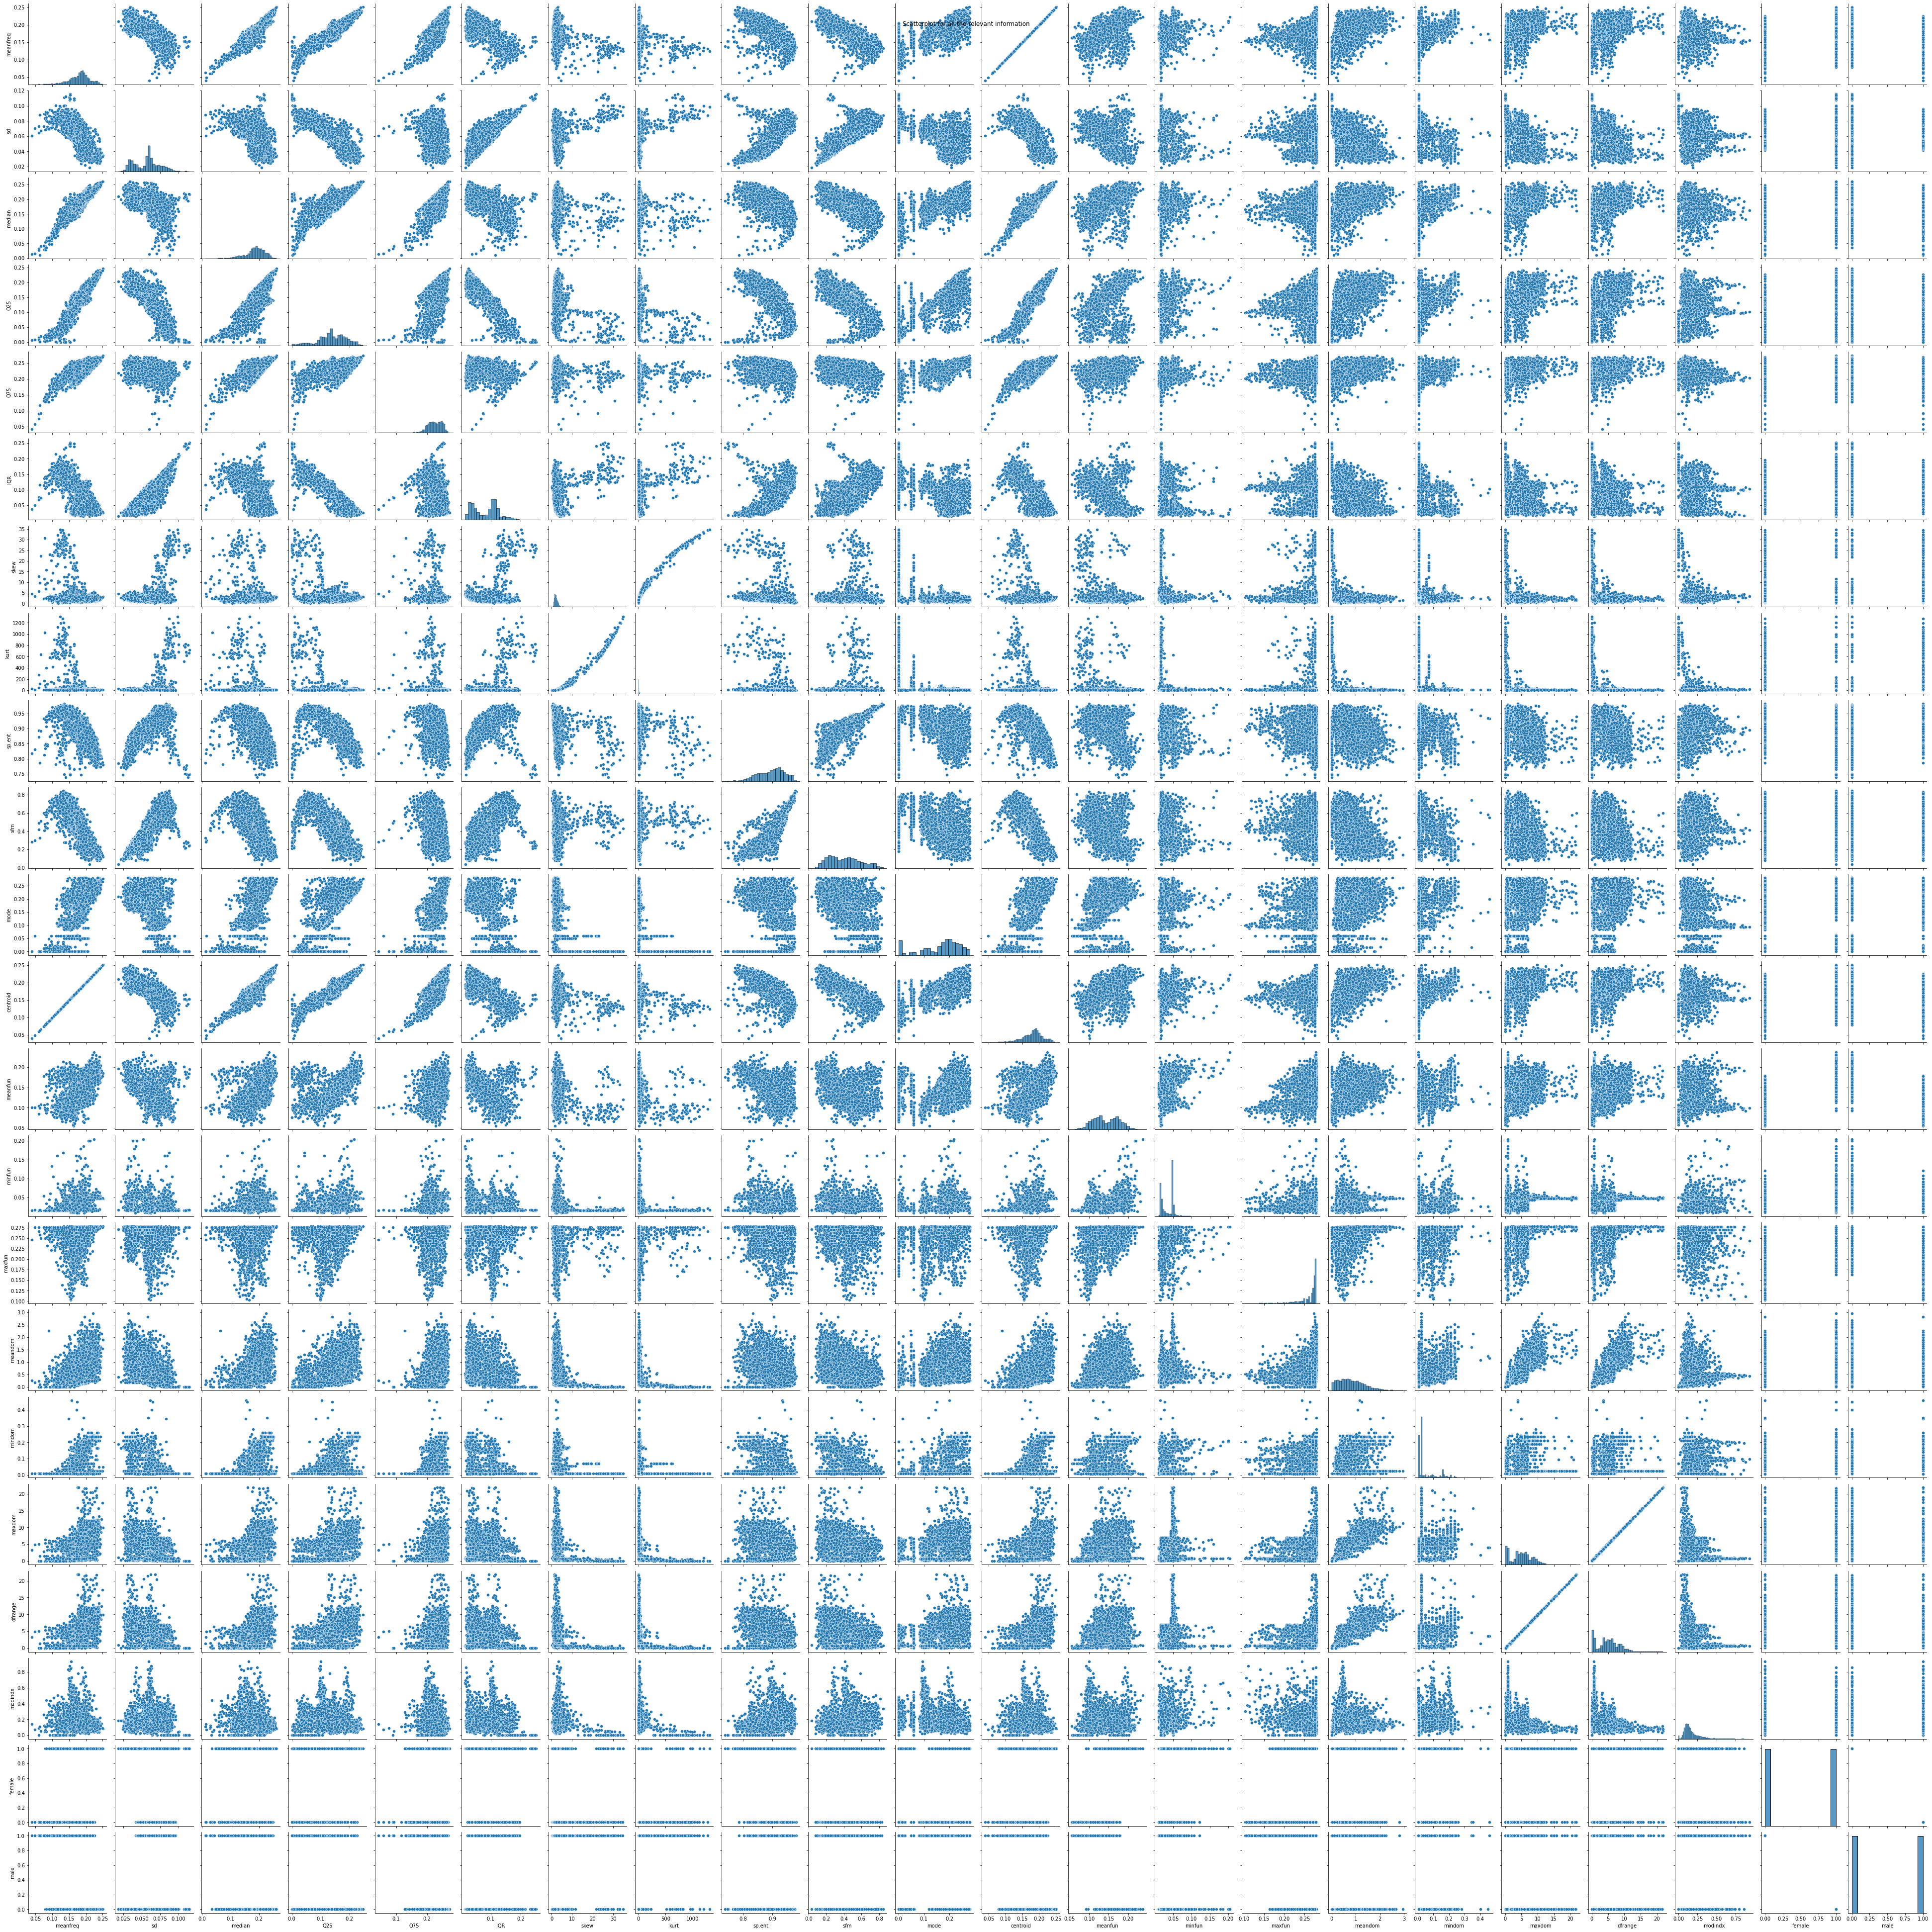

In [45]:
df_subset = df.loc[:,'meanfreq':'male']
sns.pairplot(df_subset)
plt.suptitle("Scatterplot for all the relevant information")
plt.show()

If I look at the scatterplot above I see a few that have linear regression visible. I see that dfrange/maxdom, centroid/meanfreq, kurt/skew do have some correlation with each other. 

In [17]:
df['maxdom'].value_counts()

0.007812     61
7.000000     21
5.156250     16
12.023438    15
0.562500     13
             ..
1.781250      1
2.570312      1
1.664062      1
4.687500      1
4.210938      1
Name: maxdom, Length: 1054, dtype: int64

In [84]:
X = df.loc[:,'meanfreq':'male'] #This gets all the columns from Time to Amount
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


### Exploratory data analysis:

Present relevant graphs and tables with respect to your problem:

In [85]:
df_subset.corr()

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   
female    0.337415 -0.479539  0.283919  0.511455 -0.066906 -0.618916   
male     -0.337415  0.479539 -0.283919 -0.511455  0.066906  0.618916   

              skew      kurt    sp.ent       sfm  ...   meanfun    minfun  \
meanfreq -0.322327 -0.316036 -0.601203 -0.784332  ...  0.460844  0.383937   
sd        0.314597  0.346241  0.716620  0.838086  ... -0.466281 -0.345609   
median   -0.257407 -0.243382 -0.502005 -0.661690  ...  0.414909  0.337602   
Q25      -0.319475 -0.350182 -0.648126 -0.766875  ...  0.545035  0.320994   
Q75      -0.206339 -0.148881 -0.174905 -0.378198  ...  0.155091  0.258002   
IQR       0.249497  0.316185  0.640813  0.663601  ... -0.534462 -0.222680   
skew      1.000000  0.977020 -0.195459  0.079694  ... -0.167668 -0.216954   
kurt      0.977020  1.000000 -0.127644  0.109884  ... -0.194560 -0.203201   
sp.ent   -0.195459 -0.127644  1.000000  0.866411  ... -0.513194 -0.305826   
sfm       0.079694  0.109884  0.866411  1.000000  ... -0.421066 -0.362100   
mode     -0.434859 -0.406722 -0.325298 -0.485913  ...  0.324771  0.385467   
centroid -0.322327 -0.316036 -0.601203 -0.784332  ...  0.460844  0.383937   
meanfun  -0.167668 -0.194560 -0.513194 -0.421066  ...  1.000000  0.339387   
minfun   -0.216954 -0.203201 -0.305826 -0.362100  ...  0.339387  1.000000   
maxfun   -0.080861 -0.045667 -0.120738 -0.192369  ...  0.311950  0.213987   
meandom  -0.336848 -0.303234 -0.293562 -0.428442  ...  0.270840  0.375979   
mindom   -0.061608 -0.103313 -0.294869 -0.289593  ...  0.162163  0.082015   
maxdom   -0.305651 -0.274500 -0.324253 -0.436649  ...  0.277982  0.317860   
dfrange  -0.304640 -0.272729 -0.319054 -0.431580  ...  0.275154  0.316486   
modindx  -0.169325 -0.205539  0.198074  0.211477  ... -0.054858  0.002042   
female   -0.036627 -0.087195 -0.490552 -0.357499  ...  0.833921  0.136692   
male      0.036627  0.087195  0.490552  0.357499  ... -0.833921 -0.136692   

            maxfun   meandom    mindom    maxdom   dfrange   modindx  \
meanfreq  0.274004  0.536666  0.229261  0.519528  0.515570 -0.216979   
sd       -0.129662 -0.482726 -0.357667 -0.482278 -0.475999  0.122660   
median    0.251328  0.455943  0.191169  0.438919  0.435621 -0.213298   
Q25       0.199841  0.467403  0.302255  0.459683  0.454394 -0.141377   
Q75       0.285584  0.359181 -0.023750  0.335114  0.335648 -0.216475   
IQR      -0.069588 -0.333362 -0.357037 -0.337877 -0.331563  0.041252   
skew     -0.080861 -0.336848 -0.061608 -0.305651 -0.304640 -0.169325   
kurt 

In [86]:
corr = df.loc[:,'meanfreq':'female'].corr()
corr

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   
female    0.337415 -0.479539  0.283919  0.511455 -0.066906 -0.618916   

              skew      kurt    sp.ent       sfm  ...  centroid   meanfun  \
meanfreq -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
sd        0.314597  0.346241  0.716620  0.838086  ... -0.739039 -0.466281   
median   -0.257407 -0.243382 -0.502005 -0.661690  ...  0.925445  0.414909   
Q25      -0.319475 -0.350182 -0.648126 -0.766875  ...  0.911416  0.545035   
Q75      -0.206339 -0.148881 -0.174905 -0.378198  ...  0.740997  0.155091   
IQR       0.249497  0.316185  0.640813  0.663601  ... -0.627605 -0.534462   
skew      1.000000  0.977020 -0.195459  0.079694  ... -0.322327 -0.167668   
kurt      0.977020  1.000000 -0.127644  0.109884  ... -0.316036 -0.194560   
sp.ent   -0.195459 -0.127644  1.000000  0.866411  ... -0.601203 -0.513194   
sfm       0.079694  0.109884  0.866411  1.000000  ... -0.784332 -0.421066   
mode     -0.434859 -0.406722 -0.325298 -0.485913  ...  0.687715  0.324771   
centroid -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
meanfun  -0.167668 -0.194560 -0.513194 -0.421066  ...  0.460844  1.000000   
minfun   -0.216954 -0.203201 -0.305826 -0.362100  ...  0.383937  0.339387   
maxfun   -0.080861 -0.045667 -0.120738 -0.192369  ...  0.274004  0.311950   
meandom  -0.336848 -0.303234 -0.293562 -0.428442  ...  0.536666  0.270840   
mindom   -0.061608 -0.103313 -0.294869 -0.289593  ...  0.229261  0.162163   
maxdom   -0.305651 -0.274500 -0.324253 -0.436649  ...  0.519528  0.277982   
dfrange  -0.304640 -0.272729 -0.319054 -0.431580  ...  0.515570  0.275154   
modindx  -0.169325 -0.205539  0.198074  0.211477  ... -0.216979 -0.054858   
female   -0.036627 -0.087195 -0.490552 -0.357499  ...  0.337415  0.833921   

            minfun    maxfun   meandom    mindom    maxdom   dfrange  \
meanfreq  0.383937  0.274004  0.536666  0.229261  0.519528  0.515570   
sd       -0.345609 -0.129662 -0.482726 -0.357667 -0.482278 -0.475999   
median    0.337602  0.251328  0.455943  0.191169  0.438919  0.435621   
Q25       0.320994  0.199841  0.467403  0.302255  0.459683  0.454394   
Q75       0.258002  0.285584  0.359181 -0.023750  0.335114  0.335648   
IQR      -0.222680 -0.069588 -0.333362 -0.357037 -0.337877 -0.331563   
skew     -0.216954 -0.080861 -0.336848 -0.061608 -0.305651 -0.304640   
kurt     -0.203201 -0.045667 -0.303234 -0.103313 -0.274500 -0.272729   
sp.ent   -0.305826 -0.120738 -0.293562 -0.294869 -0.324253 -0.319054   
sfm      -

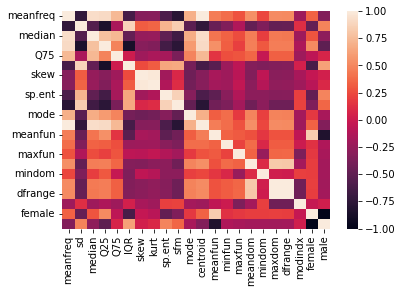

In [87]:
sns.heatmap(df_subset.corr());

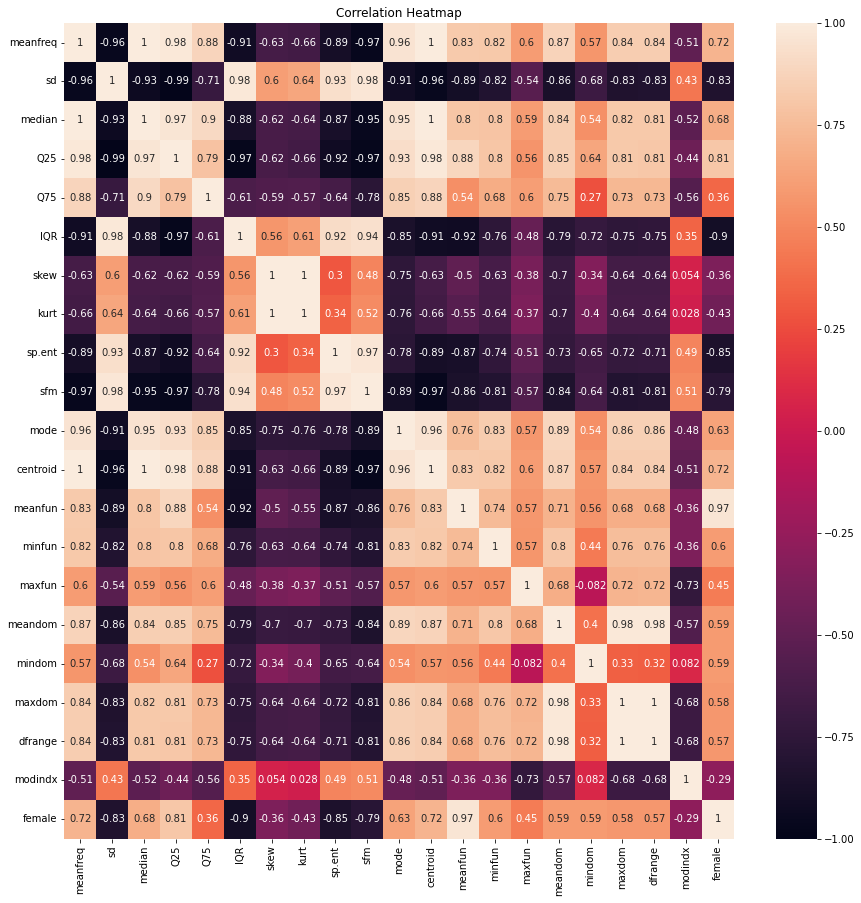

In [88]:
plt.figure(figsize=(15, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

After making the correlationmaps I can confirm that dfrange/maxdom, centroid/median and centroid/meanfreq have a very high correlation with each other. Aside from those I also notice a few new ones that have a high correlation: meandom/dfrange, meanfreq/q25, q25/centroid meandom/maxdom.

### Predictive model

Choose one of the following: k-nearest neighbor or random forest
Explain briefly in your own words how the algorithm works.
Split the data set into a training and test set. Train the model

I chose random forest because

In [99]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['meandom', 'dfrange', 'meanfreq', 'Q25']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#split the data, store it into different variables

Below I will check the knn method and compare it to 

In [100]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=8) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8380651945320715

In [101]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i)
    knn_new = knn_new.fit(X_train, y_train)
    y_test_pred_new = knn_new.predict(X_test)
    print(f"with {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))

with 1 neighbors the result is:
              precision    recall  f1-score   support

      female       0.88      0.88      0.88       457
        male       0.89      0.88      0.89       494

    accuracy                           0.88       951
   macro avg       0.88      0.88      0.88       951
weighted avg       0.88      0.88      0.88       951

with 2 neighbors the result is:
              precision    recall  f1-score   support

      female       0.81      0.96      0.88       457
        male       0.95      0.79      0.87       494

    accuracy                           0.87       951
   macro avg       0.88      0.87      0.87       951
weighted avg       0.88      0.87      0.87       951

with 3 neighbors the result is:
              precision    recall  f1-score   support

      female       0.89      0.89      0.89       457
        male       0.90      0.89      0.90       494

    accuracy                           0.89       951
   macro avg       0.89      0.8

In [110]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[396,  61],
       [ 93, 401]])

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [112]:
rf.score(X_test,y_test)

0.9190325972660357

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.90      0.93      0.92       457
        male       0.93      0.91      0.92       494

    accuracy                           0.92       951
   macro avg       0.92      0.92      0.92       951
weighted avg       0.92      0.92      0.92       951



In [113]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['female actual', 'male (actual)'], columns = ['female (pred)', 'male (pred)']) #label and make df
cm

female (pred)  male (pred)
female actual            425           32
male (actual)             45          449

### Evaluation

Calculate the accuracy, precision and recall. Describe and interpret the results in a Markdown cell.

In [114]:
(425+449)/(425+32+45+449)

0.9190325972660357

The accuracy is the same as what was predicted earlier. Which means it's well predicted.

### Conclusion